In [19]:
import re
import pandas as pd

In [20]:
f = open('WhatsApp Chat with গান্ধীনগর উন্নয়ন কমিটি.txt','r',encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: 'WhatsApp Chat with গান্ধীনগর উন্নয়ন কমিটি.txt'

In [21]:
data=f.read()

NameError: name 'f' is not defined

In [24]:
import numpy as np

print("numpy", np.__version__)


numpy 1.21.6


In [22]:
print(data)

NameError: name 'data' is not defined

In [23]:
pattern='\d{1,2}\/\d{1,2}\/\d{2,4},\s\d{1,2}:\d{2}\s?(?:am|pm|AM|PM)\s-\s'

In [18]:
print("numpy", np.__version__)


NameError: name 'np' is not defined

In [33]:
messages=re.split(pattern, data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 '+91 94758 62929: *আজ* *সন্ধ্যা ৭টায়* মন্দিরে অমাবস্যায় কালীপূজার আয়োজন করা হচ্ছে।\n\nপাড়ার সকলে উপস্থিত থেকে পূজা সুসম্পন্ন করতে সহযোগিতার হাত বাড়িয়ে দিন। 🙏।\n',
 '+91 94758 62929: ১লা বৈশাখ উপলক্ষে পৌরসভার সাফাইকর্মীরা শনিবারের পরিবর্তে এ সপ্তাহে রবিবার আসবেন।\n\nসৌজন্যেঃ বাঁকুড়া পৌরসভা <This message was edited>\n',
 '+91 94764 12116: আমাদের পাড়ার১৯ নম্বরলেনে আজ কিছুক্ষণ আগে সৌরভ চক্রবতীর মা পরলোক গমন করলেন। উনার আত্মার শান্তি কামনাকরি।\n',
 '+91 94758 62929: This message was deleted\n',
 '+91 94758 62929: 7001408103\n',
 '+91 94758 62929: রাস্তার লাইট না জ্বললে উপরের নম্বরে এখনি কল করে ডেকে নিন।\n',
 '~\u202fAnjan added +91 6295 211 034\n',
 '+91 94758 62929: *আগামীকাল (২৪শা বৈশাখ, ইং-০৭ ই মে)  সন্ধ্যা ৭টায়* মন্দিরে অমাবস্যা পূজার আয়োজন করা হচ্ছে।\n\nপাড়ার সকলে উপস্থিত থেকে পূজা সুসম্পন্ন করতে সহযোগিতার হাত বাড়িয়ে দিন। 🙏। <This message wa

In [34]:
dates=re.findall(pattern, data)
dates

['4/2/24, 10:35\u202fAM - ',
 '4/8/24, 10:14\u202fAM - ',
 '4/11/24, 11:12\u202fAM - ',
 '4/16/24, 2:11\u202fPM - ',
 '4/18/24, 11:21\u202fAM - ',
 '4/27/24, 7:52\u202fAM - ',
 '4/27/24, 7:53\u202fAM - ',
 '5/2/24, 11:38\u202fAM - ',
 '5/6/24, 9:05\u202fPM - ',
 '5/8/24, 1:37\u202fPM - ',
 '5/8/24, 1:39\u202fPM - ',
 '5/8/24, 1:40\u202fPM - ',
 '5/8/24, 1:56\u202fPM - ',
 '5/8/24, 2:01\u202fPM - ',
 '5/8/24, 2:22\u202fPM - ',
 '5/8/24, 2:46\u202fPM - ',
 '5/8/24, 3:42\u202fPM - ',
 '5/8/24, 4:06\u202fPM - ',
 '5/8/24, 4:28\u202fPM - ',
 '5/16/24, 7:26\u202fPM - ',
 '5/16/24, 7:27\u202fPM - ',
 '5/16/24, 9:10\u202fPM - ',
 '5/20/24, 12:47\u202fPM - ',
 '5/20/24, 2:47\u202fPM - ',
 '5/21/24, 7:42\u202fPM - ',
 '5/21/24, 7:42\u202fPM - ',
 '5/22/24, 7:16\u202fAM - ',
 '5/22/24, 6:56\u202fPM - ',
 '5/22/24, 6:57\u202fPM - ',
 '5/22/24, 9:42\u202fPM - ',
 '5/23/24, 8:21\u202fAM - ',
 '5/23/24, 8:25\u202fAM - ',
 '5/23/24, 8:04\u202fPM - ',
 '5/25/24, 8:45\u202fAM - ',
 '5/28/24, 9:32\u202fA

In [76]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

# Convert message_date type with coercion
df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %I:%M %p - ', errors='coerce')

# Check for any NaT values and try alternative format
df['message_date'] = df['message_date'].fillna(pd.to_datetime(df['message_date'], format='%d/%m/%y, %I:%M %p - ', errors='coerce'))

# Rename column
df.rename(columns={'message_date': 'date'}, inplace=True)

# Display the DataFrame
print(df.head())

                                        user_message                date
0  Messages and calls are end-to-end encrypted. N... 2024-04-02 10:35:00
1  *আজ* *সন্ধ্যা ৭টায়* মন্দিরে অমাবস্যায় কালীপূজা... 2024-04-08 10:14:00
2  ১লা বৈশাখ উপলক্ষে পৌরসভার সাফাইকর্মীরা শনিবারে... 2024-04-11 11:12:00
3  আমাদের পাড়ার১৯ নম্বরলেনে আজ কিছুক্ষণ আগে সৌরভ ... 2024-04-16 14:11:00
4                         This message was deleted\n 2024-04-18 11:21:00


In [77]:
df.shape

(120, 2)

In [78]:
#separate users and messages
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1:]:#user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user']= users
df['message']= messages
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,user,message
0,2024-04-02 10:35:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2024-04-08 10:14:00,group_notification,*আজ* *সন্ধ্যা ৭টায়* মন্দিরে অমাবস্যায় কালীপূজা...
2,2024-04-11 11:12:00,group_notification,১লা বৈশাখ উপলক্ষে পৌরসভার সাফাইকর্মীরা শনিবারে...
3,2024-04-16 14:11:00,group_notification,আমাদের পাড়ার১৯ নম্বরলেনে আজ কিছুক্ষণ আগে সৌরভ ...
4,2024-04-18 11:21:00,group_notification,This message was deleted\n


In [79]:
df['year']=df['date'].dt.year

In [80]:
df.head()

,date,user,message,year
0,2024-04-02 10:35:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024
1,2024-04-08 10:14:00,group_notification,*আজ* *সন্ধ্যা ৭টায়* মন্দিরে অমাবস্যায় কালীপূজা...,2024
2,2024-04-11 11:12:00,group_notification,১লা বৈশাখ উপলক্ষে পৌরসভার সাফাইকর্মীরা শনিবারে...,2024
3,2024-04-16 14:11:00,group_notification,আমাদের পাড়ার১৯ নম্বরলেনে আজ কিছুক্ষণ আগে সৌরভ ...,2024
4,2024-04-18 11:21:00,group_notification,This message was deleted\n,2024


In [81]:
df['month']=df['date'].dt.month_name()

In [82]:
df['day']=df['date'].dt.day

In [83]:
df['hour']=df['date'].dt.hour


In [84]:
df['minute']=df['date'].dt.minute

In [85]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2024-04-02 10:35:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,April,2,10,35
1,2024-04-08 10:14:00,group_notification,*আজ* *সন্ধ্যা ৭টায়* মন্দিরে অমাবস্যায় কালীপূজা...,2024,April,8,10,14
2,2024-04-11 11:12:00,group_notification,১লা বৈশাখ উপলক্ষে পৌরসভার সাফাইকর্মীরা শনিবারে...,2024,April,11,11,12
3,2024-04-16 14:11:00,group_notification,আমাদের পাড়ার১৯ নম্বরলেনে আজ কিছুক্ষণ আগে সৌরভ ...,2024,April,16,14,11
4,2024-04-18 11:21:00,group_notification,This message was deleted\n,2024,April,18,11,21


In [86]:
df[df['user']=='Suman'].shape

(0, 8)

In [87]:
words=[]
for message in df['message']:
   words.extend(message.split())

In [88]:
len(words)

2255

In [89]:
import re

text = "Check out these sites: www.google.com and www.gmail.com"
urls = re.findall(r'(https?://\S+|www\.\S+)', text)
print(urls)


['www.google.com', 'www.gmail.com']


In [90]:
links = []
# Iterate over each message and extract URLs
for message in df['message']:
    urls = re.findall(r'(https?://\S+|www\.\S+)', message)
    links.extend(urls)
      # Print URLs for each message

# Optionally, print all extracted links
len(links)


0

In [91]:
x=df['user'].value_counts().head()

In [92]:
import matplotlib.pyplot as plt

In [93]:
name=x.index
count=x.values

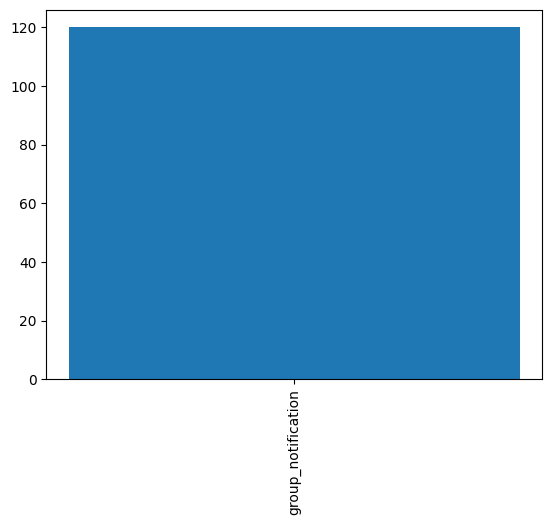

In [94]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [95]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'user':'Name','count':'Percent'})

,index,Name
0,group_notification,100.0


In [96]:
# Open and read the stop words file
with open('stop_hinglish.txt', 'r') as f:
    stop_words = set(f.read().split())  # Split the content into individual words and convert to a set for faster lookup

# Filter the DataFrame to exclude unwanted rows
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']

# Initialize an empty list to store the processed words
words = []

# Process each message in the DataFrame
for message in temp['message']:
    if isinstance(message, str):  # Ensure the message is a string
        for word in message.lower().split():  # Split the message into words
            if word not in stop_words:  # Filter out stop words
                words.append(word)


In [97]:
print(type(df['message'].iloc[0]))  # Check the type of the first element


<class 'str'>


In [98]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

""


In [99]:
!pip install emoji

In [100]:
import emoji
from collections import Counter
import pandas as pd

all_emojis = []

# Iterate over each message in the DataFrame
for message in df['message']:
    # Extract emojis from the message using is_emoji
    emojis = [char for char in message if emoji.is_emoji(char)]
    all_emojis.extend(emojis)

# Count the frequency of each emoji
emoji_counts = Counter(all_emojis)

# Convert the Counter object to a DataFrame
emoji_df = pd.DataFrame(emoji_counts.most_common(), columns=['emoji', 'count'])

# Display the DataFrame
print(emoji_df)


  emoji  count
0     🙏     12
1     🟠      4
2     💐      3
3     🕉      2
4     😄      1
5     😌      1
6     👏      1
7     🏻      1


In [101]:
df['month_num']=df['date'].dt.month

In [102]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [103]:
timeline

,year,month_num,month,message
0,2024,4,April,7
1,2024,5,May,31
2,2024,6,June,19
3,2024,7,July,38
4,2024,8,August,25


In [104]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [105]:
timeline['time']=time

In [106]:
timeline

,year,month_num,month,message,time
0,2024,4,April,7,April-2024
1,2024,5,May,31,May-2024
2,2024,6,June,19,June-2024
3,2024,7,July,38,July-2024
4,2024,8,August,25,August-2024


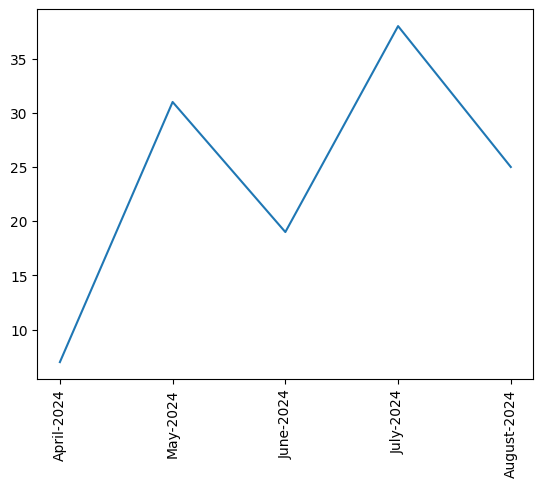

In [107]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()


In [108]:
df['only_date']=df['date'].dt.date

In [109]:
daily_timeline=df.groupby('only_date').count()['message'].reset_index()

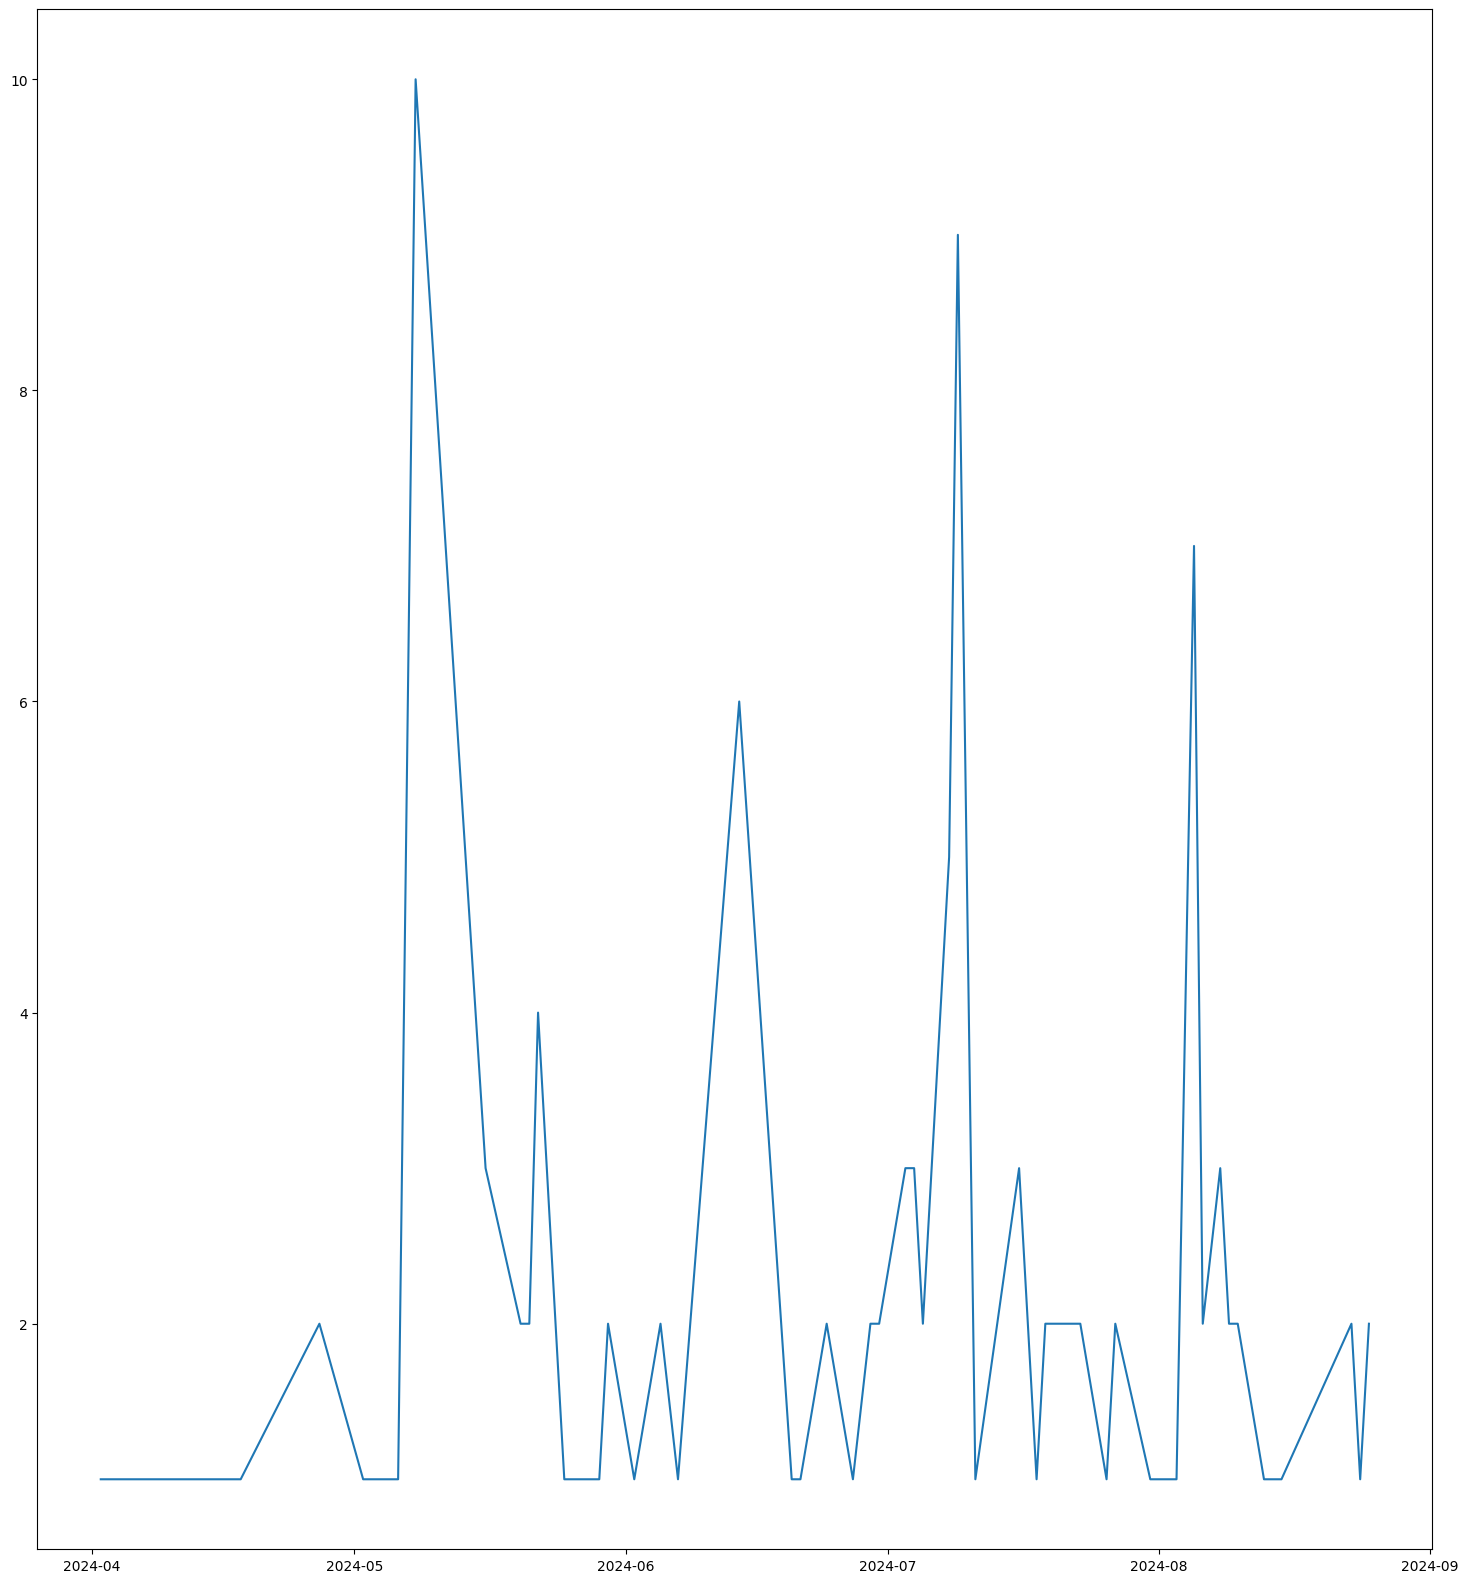

In [110]:
plt.figure(figsize=(18,20))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [111]:
df['day_name']=df['date'].dt.day_name()

In [112]:
df['day_name'].value_counts()

Tuesday      22
Thursday     22
Wednesday    21
Monday       18
Friday       18
Saturday     14
Sunday        5
Name: day_name, dtype: int64

In [113]:
df['month'].value_counts()

July      38
May       31
August    25
June      19
April      7
Name: month, dtype: int64

In [114]:
period = []

for hour in df['hour']:
    if hour == 23:
        period.append(f"{hour:02}-00")
    elif hour == 0:
        period.append(f"00-{hour+1:02}")
    else:
        period.append(f"{hour:02}-{hour+1:02}")

df['period'] = period


In [115]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
78,2024-07-09 14:37:00,group_notification,<Media omitted>\n,2024,July,9,14,37,7,2024-07-09,Tuesday,14-15
84,2024-07-16 11:40:00,group_notification,~ Shubhendu Patra added +91 94343 35251\n,2024,July,16,11,40,7,2024-07-16,Tuesday,11-12
111,2024-08-10 09:05:00,group_notification,বেসরকারি সূত্রের খবর গান্ধীনগর এবং উদীয়মান পল...,2024,August,10,9,5,8,2024-08-10,Saturday,09-10
51,2024-06-24 22:06:00,group_notification,<Media omitted>\n,2024,June,24,22,6,6,2024-06-24,Monday,22-23
75,2024-07-09 11:33:00,group_notification,<Media omitted>\n,2024,July,9,11,33,7,2024-07-09,Tuesday,11-12


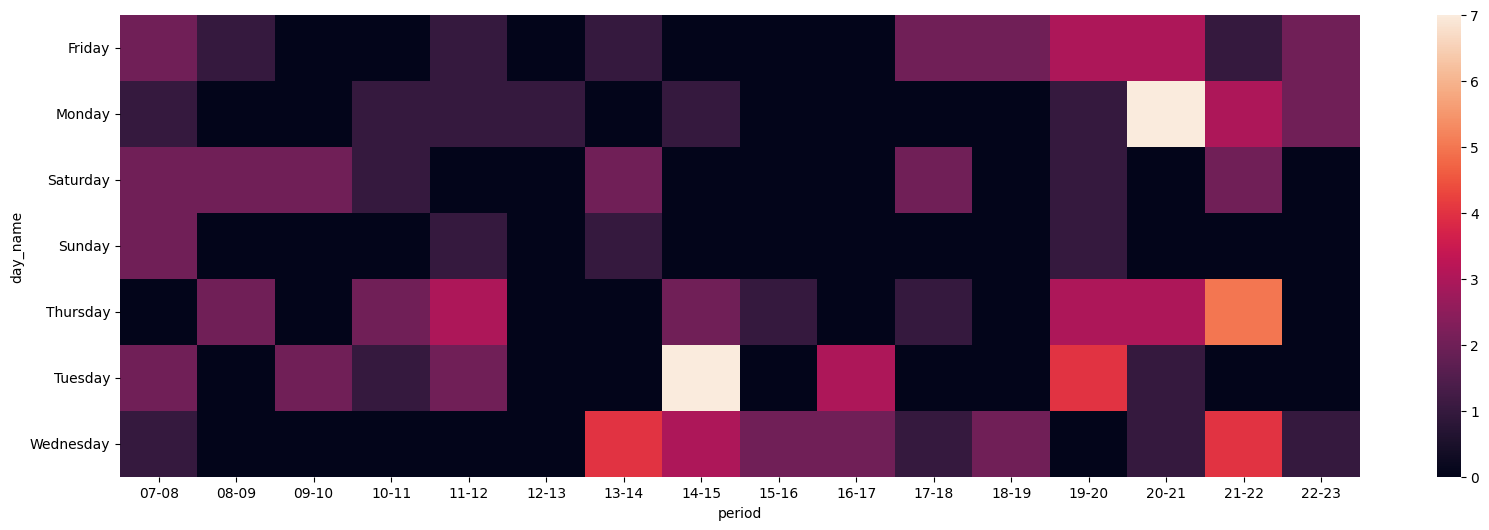

In [116]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()

In [117]:
(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))

period,07-08,08-09,09-10,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23
day_name,,,,,,,,,,,,,,,,
Friday,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,3.0,3.0,1.0,2.0
Monday,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,3.0,2.0
Saturday,2.0,2.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0
Sunday,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Thursday,0.0,2.0,0.0,2.0,3.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,3.0,3.0,5.0,0.0
Tuesday,2.0,0.0,2.0,1.0,2.0,0.0,0.0,7.0,0.0,3.0,0.0,0.0,4.0,1.0,0.0,0.0
Wednesday,1.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,2.0,2.0,1.0,2.0,0.0,1.0,4.0,1.0
